# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhen Han 

Last Name: Si 

Student ID: 999671870

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import sqlite3 as sql
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import json
import os


In [3]:
a = sql.connect('sf_data.sqlite') #connect service to the sql and get the data
cursor = a.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") #to check the table names of the data
print(cursor.fetchall()) #and print it

[('crime',), ('noise',), ('parking',), ('schools',), ('parks',), ('zillow',), ('mobile_food_permits',), ('mobile_food_locations',), ('mobile_food_schedule',)]


In [4]:
#get the full data of table mobile_food_permits and see what we can do with it
table = pd.read_sql_query("SELECT * from mobile_food_permits", a)
table

permit     Status                                          Applicant  \
0    16MFF-0027   APPROVED                                     F & C Catering   
1    13MFF-0102    EXPIRED                                   Natan's Catering   
2    16MFF-0069   APPROVED                                      Munch A Bunch   
3    16MFF-0051   APPROVED                                    Park's Catering   
4    16MFF-0010  REQUESTED                                       Pipo's Grill   
5    16MFF-0024   APPROVED                         Off the Grid Services, LLC   
6    14MFF-0034    EXPIRED                                      Bach Catering   
7    16MFF-0048  REQUESTED                           Singh Brothers Ice Cream   
8    16MFF-0036   APPROVED    Roadside Rotisserie Corporation / Country Grill   
9    14MFF-0001    EXPIRED                                  Sun Rise Catering   
10   16MFF-0037   APPROVED                                     D & T Catering   
11   15MFF-0007  REQUESTED                                   Julie's Hot Dogs   
12   16MFF-0047   APPROVED                                    Golden Catering   
13   16MFF-0053   APPROVED                                     Eva's Catering   
14   14MFF-0088    EXPIRED                                         La Falafel   
15   15MFF-0024   INACTIVE                                    Taza Halal Cart   
16   16MFF-0071   APPROVED                                 San Pancho's Tacos   
17   15MFF-0122  REQUESTED                                     Tacos El Primo   
18   14MFF-0035    EXPIRED                                   Cheese Gone Wild   
19   16MFF-0046   APPROVED                           DO UC US Mobile Catering   
20   15MFF-0006  REQUESTED                                    Mora Taco Truck   
21   16MFF-0058   APPROVED  San Francisco Carts & Concessions, Inc. DBA St...   
22   16MFF-0049   APPROVED                                         Got Snacks   
23   15MFF-0015  REQUESTED                                     The Whole Cart   
24   13MFF-0128  REQUESTED                                 Sinthya's Hot Dogs   
25   14MFF-0076    EXPIRED  San Francisco Carts & Concessions, Inc. DBA St...   
26   15MFF-0130  REQUESTED                                    Tacos Esmeralda   
27   16MFF-0023   APPROVED                         Off the Grid Services, LLC   
28   14MFF-0048    EXPIRED  The New York Frankfurter Co. of CA, Inc. DBA: ...   
29   15MFF-0044  REQUESTED                                         Gour Chaat   
..          ...        ...                                                ...   
165  17MFF-0096  REQUESTED                                    Rita's Catering   
166  17MFF-0076  REQUESTED                                 Creme Brulee To Go   
167  17MFF-0103  REQUESTED                                    Kara's Cupcakes   
168  17MFF-0086  REQUESTED                                      The Chai Cart   
169  17MFF-0070  REQUESTED                         Off the Grid Services, LLC   
170  17MFF-0068  REQUESTED                                            Mob Dog   
171  17MFF-0101  REQUESTED                   San Francisco Street Foods, Inc.   
172  17MFF-0085  REQUESTED                                      The Chai Cart   
173  17MFF-0114  REQUESTED                                    Halal Cart, LLC   
174  17MFF-0107  REQUESTED                           The Sandwich Stand, LLC.   
175  17MFF-0106  REQUESTED  The New York Frankfurter Co. of CA, Inc. DBA: ...   
176  17MFF-0087  REQUESTED                                          JapaCurry   
177  17MFF-0072  REQUESTED                                    Taza Halal Cart   
178  17MFF-0065  REQUESTED    Roadside Rotisserie Corporation / Country Grill   
179  17MFF-0118  REQUESTED                                   Kettle Corn Star   
180  17MFF-0100  REQUESTED                   San Francisco Street Foods, Inc.   
181  17MFF-0108  REQUESTED                           The Sandwich Stand, LLC.   
182  17MFF-0083  REQUESTED              

In [5]:
#get the full data of table mobile_food_locations and see what we can do with it
table2 = pd.read_sql_query("SELECT * from mobile_food_locations", a)
table2

locationid                                LocationDescription  \
0        762182        TOWNSEND ST: 05TH ST to 06TH ST (400 - 499)   
1        437211      MISSOURI ST: 20TH ST to SIERRA ST (500 - 630)   
2        765880    17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299)   
3        765690  CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...   
4        751253        FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899)   
5        761933     05TH ST: BLUXOME ST to TOWNSEND ST (650 - 699)   
6        526124  INDUSTRIAL ST: PALOU AVE to QUESADA AVE (51 - ...   
7        765527  FITZGERALD AVE: HAWES ST to INGALLS ST (1100 -...   
8        761934  BRANNAN ST: STANFORD ST to JACK LONDON ALY (32...   
9        763522  BUSH ST: 01ST ST \ MARKET ST to BATTERY ST (1 ...   
10       509478        RUSS ST: HOWARD ST to FOLSOM ST (100 - 199)   
11       763599   BROADWAY: BRODERICK ST to BAKER ST (2800 - 2899)   
12       765884        LARKIN ST: FERN ST to BUSH ST (1127 - 1199)   
13       765702  NAPOLEON ST: EVANS AVE \ TOLAND ST to JERROLD ...   
14       509492   FOLSOM ST: RAUSCH ST to RODGERS ST (1148 - 1175)   
15       763603  FRANCISCO ST: POLK ST to VAN NESS AVE (1100 - ...   
16       623661       MISSION ST: 22ND ST to 23RD ST (2600 - 2699)   
17       765202  BAY SHORE BLVD: LELAND AVE to VISITACION AVE (...   
18       765723        05TH ST: WELSH ST to BRANNAN ST (530 - 599)   
19       765530  JENNINGS ST: VAN DYKE AVE to WALLACE AVE (2100...   
20       765518  HOLLISTER AVE: HAWES ST to INGALLS ST (1000 - ...   
21       765710            BURKE AVE: END to 03RD ST (1500 - 1599)   
22       531040  VALENCIA ST: ROSA PARKS LN to 15TH ST (338 - 399)   
23       626189  MARKET ST: 01ST ST \ BUSH ST to 02ND ST (501 -...   
24       765941  CAPITOL AVE: DE MONTFORT AVE to OCEAN AVE (120...   
25       763598   GREEN ST: BRODERICK ST to BAKER ST (2700 - 2799)   
26       763592        BROADWAY: BAKER ST to LYON ST (2900 - 2999)   
27       646997  WILLIAMS AVE: APOLLO ST to PHELPS ST \ VESTA S...   
28       526148   SANSOME ST: PINE ST to CALIFORNIA ST (200 - 299)   
29       765531   HARBOR RD: NORTHRIDGE RD to INGALLS ST (1 - 299)   
..          ...                                                ...   
724      934396     GREEN ST: THE EMBARCADERO to FRONT ST (1 - 49)   
725      934586           TREAT AVE: MISTRAL ST to END (630 - 699)   
726      934655  03RD ST: MARIN ST to ARTHUR AVE \ CARGO WAY (3...   
727      934441           BERRY ST: 06TH ST to KING ST (400 - 431)   
728      934380  25TH ST: MINNESOTA ST to I-280 N ON RAMP \ IND...   
729      934520  BEALE ST: HARRISON ST to BRYANT ST \ DELANCEY ...   
730      934591        YORK ST: MARIPOSA ST to 18TH ST (500 - 599)   
731      934510  INDIANA ST: 23RD ST to 25TH ST \ I-280 N ON RA...   
732      934435  MISSION ST: 02ND ST to NEW MONTGOMERY ST (600 ...   
733      934521       CALIFORNIA ST: DRUMM ST to DAVIS ST (1 - 99)   
734      934394  MARKET ST: 04TH ST \ ELLIS ST \ STOCKTON ST to...   
735      934580    LE CONTE AVE: 03RD ST to KEITH ST (1039 - 1099)   
736      719119  MARKET ST: 09TH ST \ LARKIN ST to 10TH ST \ FE...   
737      719121  MARKET ST: 09TH ST \ LARKIN ST to 10TH ST \ FE...   
738      934995  BATTERY ST: CALIFORNIA ST to HALLECK ST (200 -...   
739      844601  CALIFORNIA ST: LEIDESDORFF ST to MONTGOMERY ST...   
740      934406   BATTERY ST: PINE ST to CALIFORNIA ST (100 - 199)   
741      934405  LARKIN ST: FULTON ST to MCALLISTER ST (200 - 299)   
742      936494  GEARY BLVD: PRESIDIO AVE to MASONIC AVE (2601 ...   
743      936620    PRESIDIO AVE: POST ST to GEARY BLVD (900 - 999)   
744      936622    16TH ST: SPENCER ST to DOLORES ST (3220 - 3299)   
745      936625  OTIS ST: GOUGH ST \ MCCOPPIN ST to 13TH ST \ D...   
746      936619  GROVE ST: SCOTT ST to DIVISADERO ST (1200 - 1299)   
747      936623  MARKET ST: CHURCH ST to 15TH ST (2101 - 2195) ...   
748      934356       MISSION ST: 19TH ST to 20TH ST (2300 - 2399)   
749      936626

In [6]:
#get the full data of table mobile_food_schedule and see what we can do with it
table3 = pd.read_sql_query("SELECT * from mobile_food_schedule", a)
table3

locationid      permit DayOfWeek  EndHour  StartHour
0         305727  11MFF-0040        Mo       15         10
1         305727  11MFF-0040        Tu       15         10
2         305727  11MFF-0040        We       15         10
3         305727  11MFF-0040        Th       15         10
4         305727  11MFF-0040        Fr       15         10
5         305727  11MFF-0040        Sa       15         10
6         305727  11MFF-0040        Su       15         10
7         305727  11MFF-0040        Mo       20         17
8         305727  11MFF-0040        Tu       20         17
9         305727  11MFF-0040        We       20         17
10        305727  11MFF-0040        Th       20         17
11        305727  11MFF-0040        Fr       20         17
12        305727  11MFF-0040        Sa       20         17
13        305727  11MFF-0040        Su       20         17
14        305735  11MFF-0040        Mo       15         10
15        305735  11MFF-0040        Tu       15         10
16        305735  11MFF-0040        We       15         10
17        305735  11MFF-0040        Th       15         10
18        305735  11MFF-0040        Fr       15         10
19        305735  11MFF-0040        Sa       15         10
20        305735  11MFF-0040        Su       15         10
21        305735  11MFF-0040        Mo       20         17
22        305735  11MFF-0040        Tu       20         17
23        305735  11MFF-0040        We       20         17
24        305735  11MFF-0040        Th       20         17
25        305735  11MFF-0040        Fr       20         17
26        305735  11MFF-0040        Sa       20         17
27        305735  11MFF-0040        Su       20         17
28        321365  11MFF-0070        Mo       18          8
29        321365  11MFF-0070        Tu       18          8
...          ...         ...       ...      ...        ...
3562      936622  17MFF-0125        Mo       11         10
3563      936622  17MFF-0125        Tu       11         10
3564      936622  17MFF-0125        We       11         10
3565      936622  17MFF-0125        Th       11         10
3566      936622  17MFF-0125        Fr       11         10
3567      936623  17MFF-0125        Mo       11         10
3568      936623  17MFF-0125        Tu       11         10
3569      936623  17MFF-0125        We       11         10
3570      936623  17MFF-0125        Th       11         10
3571      936623  17MFF-0125        Fr       11         10
3572      936624  17MFF-0125        Mo        0         11
3573      936624  17MFF-0125        Tu        0         11
3574      936624  17MFF-0125        We        0         11
3575      936624  17MFF-0125        Th        0         11
3576      936624  17MFF-0125        Fr        0         11
3577      936625  17MFF-0125        Mo        9          6
3578      936625  17MFF-0125        Tu        9          6
3579      936625  17MFF-0125        We        9          6
3580      936625  17MFF-0125        Th        9          6
3581      936625  17MFF-0125        Fr        9          6
3582      936625  17MFF-0125        Mo       15         11
3583      936625  17MFF-0125        Tu       15         11
3584      936625  17MFF-0125        We       15         11
3585      936625  17MFF-0125        Th       15         11
3586      936625  17MFF-0125        Fr       15         11
3587      936872  17MFF-0126        Mo       17          9
3588      936872  17MFF-0126        Tu       17          9
3589      936872  17MFF-0126        We       17          9
3590      936872  17MFF-0126        Th       17          9
3591      936872  17MFF-0126        Fr       17          9

[3592 rows x 5 columns]

In [7]:
#by connecting to sql, read the vendor data.
#I join the schedule and permits data together base on the index permit number, and group them by applicants.
#And count the amount of time they appear in the joint dataset
#output only applicant, permit and Count
vendor = pd.read_sql("""
        SELECT Applicant, mobile_food_schedule.permit, COUNT(DISTINCT locationid)
        FROM (mobile_food_schedule INNER JOIN mobile_food_permits ON mobile_food_schedule.permit = mobile_food_permits.permit) 
        GROUP BY Applicant 
        ORDER BY COUNT(DISTINCT locationid) DESC LIMIT 20
        """, a)

In [8]:
vendor


Applicant      permit  COUNT(DISTINCT locationid)
0                May Catering  17MFF-0110                          58
1       Anas Goodies Catering  17MFF-0111                          37
2            Natan's Catering  13MFF-0102                          37
3              Liang Bai Ping  17MFF-0090                          33
4             Park's Catering  16MFF-0051                          23
5    Singh Brothers Ice Cream  16MFF-0048                          21
6          John's Catering #5  17MFF-0084                          19
7          Mang Hang Catering  14MFF-0109                          19
8           Sun Rise Catering  14MFF-0001                          19
9              D & T Catering  16MFF-0037                          17
10           Two G's Catering  17MFF-0073                          17
11        Steve's Mobile Deli  17MFF-0091                          16
12  Mini Mobile Food Catering  17MFF-0089                          15
13              Quan Catering  17MFF-0095                          15
14             F & C Catering  16MFF-0027                          13
15               M M Catering  17MFF-0109                          13
16            Mike's Catering  17MFF-0092                          13
17              Bach Catering  14MFF-0034                          11
18              Munch A Bunch  16MFF-0069                          10
19             Eva's Catering  16MFF-0055                           8

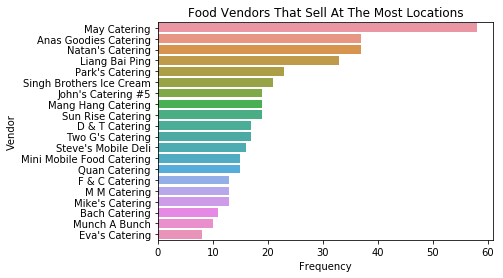

In [9]:
#make the plot to let it easier to see and analyze 
sns.barplot('COUNT(DISTINCT locationid)', 'Applicant', data = vendor)
plt.title('Food Vendors That Sell At The Most Locations')
plt.xlabel('Frequency')
plt.ylabel('Vendor')
plt.show()

So base on the plot above, the vendors that sell at the most Locations are May catering, Anas Goodies Catering and Natan's Catering. 

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

# Which parts of the city are the most and least expensive?

In [10]:
#to check the whole zillow data at first
zillow = pd.read_sql_query("SELECT * from zillow", a)
zillow = zillow.dropna()
zillow

RegionName                 Date  ZriPerSqft_AllHomes  \
0          94109  2010-11-01 00:00:00                3.156   
1          94110  2010-11-01 00:00:00                2.566   
2          94122  2010-11-01 00:00:00                2.168   
3          94080  2010-11-01 00:00:00                1.666   
4          94112  2010-11-01 00:00:00                2.322   
5          94115  2010-11-01 00:00:00                3.000   
6          94117  2010-11-01 00:00:00                2.556   
7          94121  2010-11-01 00:00:00                2.170   
10         94114  2010-11-01 00:00:00                2.678   
11         94107  2010-11-01 00:00:00                2.826   
12         94116  2010-11-01 00:00:00                2.230   
13         94123  2010-11-01 00:00:00                3.170   
15         94131  2010-11-01 00:00:00                2.578   
25         94109  2010-12-01 00:00:00                3.176   
26         94110  2010-12-01 00:00:00                2.600   
27         94122  2010-12-01 00:00:00                2.194   
28         94080  2010-12-01 00:00:00                1.690   
29         94112  2010-12-01 00:00:00                2.336   
30         94115  2010-12-01 00:00:00                3.010   
31         94117  2010-12-01 00:00:00                2.578   
32         94121  2010-12-01 00:00:00                2.194   
35         94114  2010-12-01 00:00:00                2.704   
36         94107  2010-12-01 00:00:00                2.860   
37         94116  2010-12-01 00:00:00                2.260   
38         94123  2010-12-01 00:00:00                3.188   
40         94131  2010-12-01 00:00:00                2.616   
42         94134  2010-12-01 00:00:00                2.388   
44         94124  2010-12-01 00:00:00                2.386   
45         94127  2010-12-01 00:00:00                2.302   
47         94105  2010-12-01 00:00:00                3.356   
...          ...                  ...                  ...   
1660       94114  2016-05-01 00:00:00                4.184   
1661       94107  2016-05-01 00:00:00                4.408   
1662       94116  2016-05-01 00:00:00                3.114   
1663       94123  2016-05-01 00:00:00                4.704   
1664       94103  2016-05-01 00:00:00                4.404   
1665       94131  2016-05-01 00:00:00                3.860   
1667       94134  2016-05-01 00:00:00                3.064   
1669       94124  2016-05-01 00:00:00                2.982   
1670       94127  2016-05-01 00:00:00                3.152   
1672       94105  2016-05-01 00:00:00                5.094   
1675       94109  2016-06-01 00:00:00                4.638   
1676       94110  2016-06-01 00:00:00                3.968   
1677       94122  2016-06-01 00:00:00                3.004   
1678       94080  2016-06-01 00:00:00                2.708   
1679       94112  2016-06-01 00:00:00                3.162   
1680       94115  2016-06-01 00:00:00                4.372   
1681       94117  2016-06-01 00:00:00                3.848   
1682       94121  2016-06-01 00:00:00                3.108   
1685       94114  2016-06-01 00:00:00                4.182   
1686       94107  2016-06-01 00:00:00                4.390   
1687       94116  2016-06-01 00:00:00                3.122   
1689       94103  2016-06-01 00:00:00                4.398   
1690       94131  2016-06-01 00:00:00                3.862   
1693       94132  2016-06-01 00:00:00                3.064   
1695       94127  2016-06-01 00:00:00                3.144   
1701       94110  2016-07-01 00:00:00                3.960   
1702       94122  2016-07-01 00:00:00                3.022   
1704       94112  2016-07-01 00:00:00                3.150   
1710       94114  2016-07-01 00:00:00                4.168   
1711       94107  2016-07-01 00:00:00                4.362   

      MedianSoldPricePerSqft_AllHomes  PriceToRentRatio_AllHomes  \
0                          675.191300                      19.14   
1                        

In [11]:

import folium
from folium.plugins import MarkerCluster

In [12]:
#we only need RegionName, the average of ZriPerSqft_AllHomes and MedianSoldPricePerSqft_AllHomes for each region.
#so we pull a new table base on it. 
query = """
        SELECT RegionName, AVG(ZriPerSqft_AllHomes), AVG(MedianSoldPricePerSqft_AllHomes) 
        FROM zillow 
        GROUP BY RegionName
        """
zillow1 = pd.read_sql(query, a)
#Region name is zip code
zillow1['RegionName'] = [str(i) for i in zillow1['RegionName']]

zillow1

RegionName  AVG(ZriPerSqft_AllHomes)  AVG(MedianSoldPricePerSqft_AllHomes)
0       94080                  2.172000                            375.629802
1       94102                  3.984933                            626.417276
2       94103                  3.679040                            604.009929
3       94104                       NaN                           1336.128581
4       94105                  4.279173                            798.257824
5       94107                  3.665093                            592.651062
6       94108                  4.149920                            501.013201
7       94109                  3.852080                            618.325709
8       94110                  3.145520                            543.998864
9       94111                  3.669520                            445.680441
10      94112                  2.466640                            416.744886
11      94114                  3.359920                            650.127729
12      94115                  3.606293                            611.771452
13      94116                  2.441573                            466.570200
14      94117                  3.114373                            580.217632
15      94118                  2.868667                            558.667047
16      94121                  2.402933                            467.890585
17      94122                  2.386080                            453.210167
18      94123                  3.764773                            696.166788
19      94124                  2.328160                            297.008046
20      94127                  2.457733                            490.745386
21      94131                  3.044160                            560.122866
22      94132                  2.370480                            385.384982
23      94133                  3.898693                            638.636839
24      94134                  2.395173                            347.027455
25      94158                  3.720693                            657.211820

In [13]:
#Create the map for the Rent
sf_coordinate = (37.7749, -122.4194)
sf = os.getcwd() + '/SanFrancisco.Neighborhoods.json' 
#json i found from the internet that divide sf base on the zipcodes. Url:
#https://gist.github.com/cdolek/d08cac2fa3f6338d84ea

# Create the map.
map1 = folium.Map(sf_coordinate, zoom_start = 12.5)
map1.choropleth(geo_data = open(sf).read(), 
            data=zillow1,
            columns=['RegionName', 'AVG(ZriPerSqft_AllHomes)'], #considering the rent price only
            key_on='feature.id', 
            fill_color='PuBu', #darker the more expensive 
            threshold_scale=[2, 2.7, 3.4, 4.1, 4.8, 5.5], #set the scales of appearing darker/lighter of color 
            legend_name = 'Rent per square'
            )

map1


In [14]:
#create the map for the housing buy 
map2 = folium.Map(sf_coordinate, zoom_start = 13)

map2.choropleth(geo_data = open(sf).read(), 
            data=zillow1,
            columns=['RegionName', 'AVG(MedianSoldPricePerSqft_AllHomes)'], #now only consider the average sold price
            key_on='feature.id', 
            fill_color='PuBu', 
            threshold_scale=[250, 400, 500, 600, 700, 1200], #change the scale since obviously the price is much higher than rent
            legend_name = 'Selling Price Per Sqr')

map2

For above two maps i divide San Francisco base on the zip codes. 

The first map is illustrating the rent price of San Francisco. The unit is Zillow Rent Index. Higher the value, means more expensive, and darker the color. To see from the map, the region near the China town and near the pier has the most expensive rent. That is making sense since these areas are the most crowded part of the city and has larger population density than other areas. And also, places near SF downtown overall have higher renting price than other surrounding areas. It also make sense because most big firms, companies, restaurants are located near central area of San Francisco. 

The second map is illustrating the house sell price of San Francisco. The price is reflected by how darkness the region is. In general, the trend are pretty similar between two maps. However, there are still some differences that we may need to concern about. In the first map, district around the China Town is more expensive than places such as “West of Twin Peaks,” “Twin Peaks,” and “Diamond Heights.” But in the second map this is not the case and instead, it is the opposite. It may because people who rent here are young people who go to work nearby, but it is not a good idea to buy house here because this area is too crowded and too noisy. Also it may due to that this area's house is older. And still, the places near sf downtown have much higher house price than other places. So we may conclude that location is very important. 


# 2. Which parts of the city are the most dangerous (and at what times)?

In [15]:
#first check the crime data and see what can we use for this question
crime = pd.read_sql("SELECT * FROM crime WHERE Category != 'NON-CRIMINAL'", a)
#get the CrimeHour base on the Datetime data. Selecting the first hour data. 
crime['CrimeHour'] = [i[11:13] for i in crime.loc[:,'Datetime']]
crime

IncidntNum         Category  \
0        150098210          ROBBERY   
1        150098210          ASSAULT   
2        150098210  SECONDARY CODES   
3        150098226        VANDALISM   
4        150098248  SECONDARY CODES   
5        150098248        VANDALISM   
6        150098254         BURGLARY   
7        150098260    LARCENY/THEFT   
8        150098345    LARCENY/THEFT   
9        150098345    DRUG/NARCOTIC   
10       150098345    DRUG/NARCOTIC   
11       150098345         WARRANTS   
12       150098367          ROBBERY   
13       150098373    VEHICLE THEFT   
14       150098389         WARRANTS   
15       150098395    LARCENY/THEFT   
16       150098408   OTHER OFFENSES   
17       150098414          ROBBERY   
18       150098414          ROBBERY   
19       150098414          ASSAULT   
20       150098414          ASSAULT   
21       150098420          ROBBERY   
22       150098420          ASSAULT   
23       150098420      WEAPON LAWS   
24       150098442   OTHER OFFENSES   
25       150098458          ASSAULT   
26       140009459            ARSON   
27       150098458    DRUG/NARCOTIC   
28       150098458   OTHER OFFENSES   
29       150098464    VEHICLE THEFT   
...            ...              ...   
907669   160064762          ASSAULT   
907670   160135501          ASSAULT   
907671   160148792          ASSAULT   
907672   160159727          ASSAULT   
907673   160228015          ASSAULT   
907674   160236212          ASSAULT   
907675   160314755          ASSAULT   
907676   160321017          ASSAULT   
907677   160380916          ASSAULT   
907678   160412183          ASSAULT   
907679   160454129          ASSAULT   
907680   160558066          ASSAULT   
907681   160580207          ASSAULT   
907682   160598385          ASSAULT   
907683   160600463          ASSAULT   
907684   160650446          ASSAULT   
907685   160673410          ASSAULT   
907686   160698797          ASSAULT   
907687   160757729          ASSAULT   
907688   160774137          ASSAULT   
907689   160778991          ASSAULT   
907690   160843920          ASSAULT   
907691   160857993    VEHICLE THEFT   
907692   160875832          ASSAULT   
907693   160907300          ASSAULT   
907694   169004460            FRAUD   
907695    90578136    VEHICLE THEFT   
907696   981021761         WARRANTS   
907697    81076498   MISSING PERSON   
907698   961392021   MISSING PERSON   

                                         Descript  DayOfWeek  \
0                           ROBBERY, BODILY FORCE     Sunday   
1            AGGRAVATED ASSAULT WITH BODILY FORCE     Sunday   
2                               DOMESTIC VIOLENCE     Sunday   
3       MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Tuesday   
4                               DOMESTIC VIOLENCE   Saturday   
5                   MALICIOUS MISCHIEF, VANDALISM   Saturday   
6               BURGLARY OF STORE, UNLAWFUL ENTRY   Saturday   
7                         PETTY THEFT SHOPLIFTING   Saturday   
8                         PETTY THEFT SHOPLIFTING     Sunday   
9                  POSSESSION OF METH-AMPHETAMINE     Sunday   
10          POSSESSION OF NARCOTICS PARAPHERNALIA     Sunday   
11                                 WARRANT ARREST     Sunday   
12                    ROBBERY, ARMED WITH A KNIFE     Sunday   
13                              STOLEN AUTOMOBILE     Sunday   
14                ENROUTE TO OUTSIDE JURISDICTION     Sunday   
15                   PETTY THEFT FROM LOCKED AUTO     Sunday   
16          DRIVERS LICENSE, SUSPENDED OR REVOKED     Sunday   
17               ROBBERY ON THE STREET, STRONGARM     Sunday   
18                          ROBBERY, BODILY FORCE     Sunday   
19           AGGRAVATED ASSAULT WITH BODILY FORCE     Sunday   
20                  BATTERY WITH SERIOUS INJURIES     Sunday   
21         ATTEMPTED ROBBERY WITH A DEADLY WEAPON     Sunday   
22           AGGRAVATED ASSAULT WITH BODILY FORCE     Sunday   
23                        POSS OF TEAR GAS WEAPON    

In [16]:
#get the count of the number of crime for each hour 
crime_c = pd.DataFrame(crime['CrimeHour'].value_counts())
crime_c = crime_c.reset_index()# get the index, use for later plots
crime_c = crime_c.rename(columns={'index': 'CrimeHour', 'CrimeHour': 'count'})
crime_c[['count','CrimeHour']] = crime_c[['count','CrimeHour']].apply(pd.to_numeric) #change the form to integer
crime_c

CrimeHour  count
0          18  60010
1          17  56555
2          19  54761
3          12  52020
4          16  51318
5          20  49801
6          15  48594
7           0  48227
8          22  47678
9          21  46229
10         23  43889
11         14  43815
12         13  42348
13         11  38078
14         10  36261
15          9  34209
16          8  31421
17          1  28506
18          2  23374
19          7  21122
20          3  15399
21          6  13466
22          4  10797
23          5   9821

In [17]:
#get the location for each crime 
crime_location = [[row['Lat'], row['Lon']] for index, row in crime.iterrows()]
crime_location 

[[37.7841907151119, -122.414406029855],
 [37.7841907151119, -122.414406029855],
 [37.7841907151119, -122.414406029855],
 [37.8004687042875, -122.43111854378799],
 [37.729203356539, -122.374019331833],
 [37.729203356539, -122.374019331833],
 [37.7878092959561, -122.40656817786999],
 [37.7862578545865, -122.417295322526],
 [37.7690748003847, -122.41335418701799],
 [37.7690748003847, -122.41335418701799],
 [37.7690748003847, -122.41335418701799],
 [37.7690748003847, -122.41335418701799],
 [37.7651107322703, -122.432198022433],
 [37.781752876788104, -122.42227702763999],
 [37.7422600519555, -122.387939452192],
 [37.767199940345606, -122.458638758608],
 [37.735226586208, -122.389774683064],
 [37.796902883890795, -122.40683198642701],
 [37.796902883890795, -122.40683198642701],
 [37.796902883890795, -122.40683198642701],
 [37.796902883890795, -122.40683198642701],
 [37.784696907904, -122.413609328985],
 [37.784696907904, -122.413609328985],
 [37.784696907904, -122.413609328985],
 [37.7787192

In [18]:
#the all location of crime is too messy and it costs time to run the command.
#so i decide to distinguish the area base on district.
#i get the data for PdDistrict and the count of crime in that district, group by districts.
query = """SELECT PdDistrict, COUNT(DISTINCT IncidntNum) 
        FROM crime WHERE Category != 'NON-CRIMINAL' 
        GROUP BY PdDistrict 
        ORDER BY COUNT(DISTINCT IncidntNum) 
        DESC LIMIT 15
        """
District = pd.read_sql(query, a)
District

PdDistrict  COUNT(DISTINCT IncidntNum)
0     SOUTHERN                      134024
1     NORTHERN                       87260
2      MISSION                       86834
3      CENTRAL                       77094
4      BAYVIEW                       69633
5    INGLESIDE                       61693
6      TARAVAL                       52180
7   TENDERLOIN                       46861
8         PARK                       40076
9     RICHMOND                       38562
10        None                           1

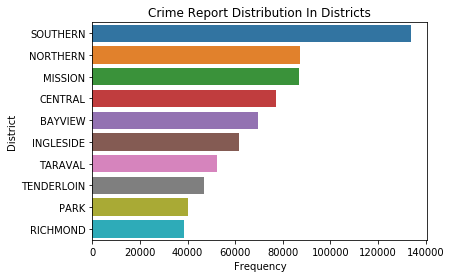

In [19]:
#create the plot for the crime number in different districts
sns.barplot('COUNT(DISTINCT IncidntNum)', 'PdDistrict', data = District)
plt.title('Crime Report Distribution In Districts')
plt.xlabel('Frequency')
plt.ylabel('District')
plt.show()

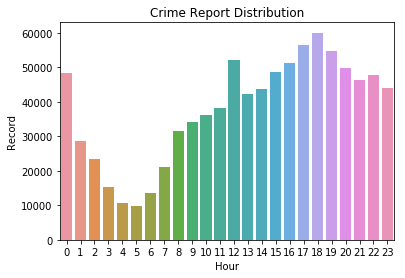

In [20]:
#create the plot for crime number in different time for each day
sns.barplot('CrimeHour', 'count', data = crime_c)
plt.title('Crime Report Distribution')
plt.xlabel('Hour')
plt.ylabel('Record')
plt.show()

Base on the first plot, we can conclude that the most dangerous places are Sourthern, Northern and Mission. And the most safe places are Richmond, Park and Tenderloin. This makes sense since we can see that the most dangerous places are either very population crowded or have cheap house rent/price. And the most safe place are either population sparsed or have high rent/buy price. This is common in every city in the world.

Base on the second plot, we can conclude the most dangerous time of a day is between 5-7 pm each day. Thats may because that first of all, the sun falls. So it is in the dark. And at that time most people are going back to their home and go to dinner, so although its dark outside there still may be many people outside, causing the crime rate to increase. And the most safe time is 4-6 am each day. Obviously at that time most people are sleeping and staying in their homes. So No chance for the criminals to make the crimes.

# 3 Are noise complaints and mobile food vendors related?

In [21]:
#get the data from noise and see what can we use for this question
noise = pd.read_sql_query("SELECT * from noise", a)
#drop the na. 
noise = noise.dropna()
noise

CaseID                           Type  \
1     6446138    amplified_sound_electronics   
2     5929789          other_excessive_noise   
3     5659943          other_excessive_noise   
4     5930704          other_excessive_noise   
5     6427526  construction_private_property   
6     5661647    amplified_sound_electronics   
7     5661981            construction_public   
8     6423810          other_excessive_noise   
9     5932159    amplified_sound_electronics   
10    5932303    amplified_sound_electronics   
11    6423715           mechanical_equipment   
12    5932598    amplified_sound_electronics   
13    6467978              vehicle_car_alarm   
15    5932865          other_excessive_noise   
16    5932866          other_excessive_noise   
17    5933542                  entertainment   
18    6446746          other_excessive_noise   
19    6470436  construction_private_property   
20    5657665  construction_private_property   
21    5623912  construction_private_property   
22    6448072          other_excessive_noise   
23    6448074  construction_private_property   
24    5930365           mechanical_equipment   
25    5932933          other_excessive_noise   
26    5932947   garbage_recycling_collection   
27    5933097    amplified_sound_electronics   
28    5936441    amplified_sound_electronics   
29    5937227          other_excessive_noise   
30    5937231               other_reallocate   
31    5937235          other_excessive_noise   
...       ...                            ...   
4764  6556284           mechanical_equipment   
4765  6669313  construction_private_property   
4766  6679699            construction_public   
4767  6684391          other_excessive_noise   
4768  6687086          other_excessive_noise   
4769  6688054    amplified_sound_electronics   
4770  6688230          other_excessive_noise   
4771  6689094  construction_private_property   
4773  6684062      delivery_service_business   
4774  6688398              vehicle_car_alarm   
4775  6688474          other_excessive_noise   
4776  6691205               other_reallocate   
4777  6692761      delivery_service_business   
4778  6692934  construction_private_property   
4779  6693797  construction_private_property   
4780  6696756  construction_private_property   
4781  6696760  construction_private_property   
4782  6696931            construction_public   
4783  6693119          other_excessive_noise   
4784  6693988          other_excessive_noise   
4785  6696163                         sirens   
4786  6696603                         sirens   
4787  6697549  construction_private_property   
4788  6698203           mechanical_equipment   
4789  6698255  construction_private_property   
4790  6699169          other_excessive_noise   
4791  6702019  construction_private_property   
4792  6698172          other_excessive_noise   
4793  6701211   garbage_recycling_collection   
4794  6757357                  entertainment   

                                              Address  \
1        Intersection of CLINTON PARK and GUERRERO ST   
2             1301 48TH AVE, SAN FRANCISCO, CA, 94122   
3        736 LEAVENWORTH ST, SAN FRANCISCO, CA, 94109   
4             1360 43RD AVE, SAN FRANCISCO, CA, 94122   
5          108 VIRGINIA AVE, SAN FRANCISCO, CA, 94110   
6              801 25TH AVE, SAN FRANCISCO, CA, 94121   
7         1275 COLUMBUS AVE, SAN FRANCISCO, CA, 94133   
8              779 LA PLAYA, SAN FRANCISCO, CA, 94121   
9            1331 FOLSOM ST, SAN FRANCISCO, CA, 94103   
10         Intersection of SUTTER ST and BRODERICK ST   
11          2701 JACKSON ST, SAN FRANCISCO, CA, 94115   
12               374 5TH ST, SAN FRANCISCO, CA, 94107   
13              634 2ND AVE, SAN FRANCISCO, CA, 94118   
15            1938 44TH AVE, SAN FRANCISCO, CA, 94116   
16            1938 44TH AVE, SAN FRANCISCO, CA, 94116   
17           1101 OCEAN AVE, SAN FRANCISCO, CA, 94112   
18              815 FELL ST, SAN FRANCISCO, CA, 94117   
19  

In [22]:
#since we only need the noise related to the vendors. So i only choose other_excessive_noise.
other_noise = noise[noise.Type == 'other_excessive_noise']
#get the location of noise
noise_location = [[row['Lat'], row['Lon']] for index, row in other_noise.iterrows()]
#for the first two plots, if we use all the noise, the program will shut down because data is so huge
#I dont have a powerful computer
noise_location = noise_location[:500]
noise_location

[[37.762047023755, -122.508365256702],
 [37.787982901643, -122.41494321619601],
 [37.76138549134, -122.502232253358],
 [37.773766740399, -122.51021162093599],
 [37.750442973322, -122.502921341214],
 [37.750442973322, -122.502921341214],
 [37.774737427988, -122.431307873818],
 [37.7537032121512, -122.42081228521799],
 [37.787947740092, -122.40444399845501],
 [37.76138549134, -122.502232253358],
 [37.76138549134, -122.502232253358],
 [37.76138549134, -122.502232253358],
 [37.76138549134, -122.502232253358],
 [37.76138549134, -122.502232253358],
 [37.76138549134, -122.502232253358],
 [37.801965659306, -122.43678769098801],
 [37.801859487362, -122.437410827828],
 [37.749634760922, -122.40519951493],
 [37.784027051244, -122.420295701941],
 [37.780851699394, -122.420147639969],
 [37.7754178820623, -122.462804861007],
 [37.763917119548005, -122.472605315109],
 [37.774086226637, -122.498409213588],
 [37.752771196712, -122.40013677927601],
 [37.756079748973, -122.41862705173901],
 [37.783607001

In [23]:
#get the location of vendor
vendor = pd.read_sql("SELECT * FROM mobile_food_locations", a)
vendor = vendor.dropna()
#location of vendor
vendor_location = [[row['Latitude'], row['Longitude']] for index, row in vendor.iterrows()]
#drop 0,0 because they are annoying
vendor_location = [i for i in vendor_location if i!=[0.0, 0.0]] 
#i only get first 300 to aviod the program to be shut down 
vendor_location = vendor_location[:300]
vendor_location

[[37.7748713162388, -122.39853170827601],
 [37.7593037663834, -122.395902231236],
 [37.7652159489938, -122.406006972029],
 [37.7488013777145, -122.400552458785],
 [37.7678524427181, -122.416104892532],
 [37.775589079959396, -122.39797690638001],
 [37.739216586262295, -122.400864373304],
 [37.7201747226493, -122.389407114342],
 [37.781264686022794, -122.39322904153799],
 [37.7909215072692, -122.400100423738],
 [37.7780755347517, -122.407711134267],
 [37.7934414335598, -122.44389121378401],
 [37.7885275753132, -122.418313685721],
 [37.7475862762565, -122.398865700796],
 [37.775950411261, -122.409294222069],
 [37.8037902440403, -122.42414517498301],
 [37.7550675419403, -122.41802613268999],
 [37.710933792981, -122.40278453801001],
 [37.7768763887765, -122.40025957520201],
 [37.7267279782571, -122.388658428832],
 [37.7189398190959, -122.390517872066],
 [37.7441784473757, -122.386715929759],
 [37.767126464778, -122.421782736139],
 [37.7898898782098, -122.399930411351],
 [37.7242977785276, -

In [24]:
#create the first map combined the cluster for the noise complaints and the icons for the vendor together
sf_coordinate = (37.7749, -122.4194)

map3 = folium.Map(sf_coordinate, zoom_start = 12.5)
#create the cluster
marker_cluster_1 = MarkerCluster().add_to(map3)
#red icon represent noise complaints. add to cluster
for location in noise_location:
    folium.Marker(location = location, popup = 'Noise Complaint', icon=folium.Icon(color='red')).add_to(map3).add_to(marker_cluster_1)
#green icon represents vendor, not add to cluster
for location in vendor_location:
    folium.Marker(location = location, popup = 'Vendor' , icon=folium.Icon(color='green')).add_to(map3)

map3

In [25]:
#create the second map that add both vendor and noise icons to the cluster 
#same as above, only difference is to add green icons to the cluster
map4 = folium.Map(sf_coordinate, zoom_start = 12.5)
marker_cluster_2 = MarkerCluster().add_to(map4)
for location in noise_location:
    folium.Marker(location = location, popup = 'Noise Complaint', icon=folium.Icon(color='red')).add_to(map4).add_to(marker_cluster_2)
for location in vendor_location:
    folium.Marker(location = location, popup = 'Vendor' , icon=folium.Icon(color='green')).add_to(map4).add_to(marker_cluster_2)

map4

In [26]:
#get all of the location of noise complaints 
other_noise2 = pd.read_sql("SELECT * FROM noise WHERE Neighborhood <> 'None' and Type = 'other_excessive_noise'", a)
noise_location2 = [[row['Lat'], row['Lon']] for index, row in other_noise2.iterrows()]

In [27]:
#create the map only for the noise complaints. Give the icon red color still. 
map5 = folium.Map(sf_coordinate, zoom_start = 12.5)
marker_cluster_1 = MarkerCluster().add_to(map5)
for location in noise_location2:
    folium.Marker(location = location, popup = 'Noise Complaint', icon=folium.Icon(color='red')).add_to(map5).add_to(marker_cluster_1)
map5

In [28]:
#get all the location data of vendor
vendor2 = pd.read_sql("SELECT * FROM mobile_food_locations", a)
vendor_location2 = [[row['Latitude'], row['Longitude']] for index, row in vendor2.iterrows()]

#get only the map for all the vendor locations. Still give the icon green color. 
map6 = folium.Map(sf_coordinate, zoom_start = 12.5)
marker_cluster_1 = MarkerCluster().add_to(map6)
for location in vendor_location:
    folium.Marker(location = location, popup = 'Vendor' , icon=folium.Icon(color='green')).add_to(map6).add_to(marker_cluster_1)

map6

For all maps, red icon represent noise complaints and green icon represents vendor locations. 

I first get the part of data from the location of noise and vendors to see if there is clear correlation between them as i illustrated in the first two maps. But as we can see from the first map, the vendor are located mainly near the SF beach and pier areas but the noise complaints there are not quite severe. The most severe noise complaints area is near the china town but at that area there isnt have many vendors. And then for second map i add both locations to the cluster and point into each locations. I find out that these two icons are not closely located for nearly every places. So I want to conclude that there is no relationship between these two variables. 

But i am afraid that it may because that i only select part of the data of datasets and it may cause bias. So for map3 and map4 i got all data and create two maps. Then i compare these two maps. I found out the areas with two most noise complaints(149 and 123) and I click these two clusters, dont have much vendors near them. In contrast, the place where most vendors located, only have 45 noise complaints(much smaller value than 149 and 123). Thus by comparing map3 and map4, i can conclude that noise is not related to the vendor. 

# 4 What are the easirest places to find parking?

In [29]:
#get all data from the parking. For here seems my computer a bit of hot, so i dont pull out the table here. 
parking = pd.read_sql("SELECT * FROM parking", a)
parking = parking.dropna()
#get the location of the parkings. 
parking_location = [[row['Lat'], row['Lon'], row['RegCap'], row['GarOrLot']] for index, row in parking.iterrows()]
parking_location

[[37.767378, -122.429344, 13, 'L'],
 [37.757272, -122.40632, 34, 'L'],
 [37.770134999999996, -122.385801, 72, 'L'],
 [37.77415, -122.418402, 130, 'G'],
 [37.793243, -122.39749499999999, 250, 'G'],
 [37.785078000000006, -122.43474499999999, 304, 'G'],
 [37.792778999999996, -122.40439199999999, 197, 'G'],
 [37.774337, -122.40325700000001, 80, ' '],
 [37.783970000000004, -122.44021799999999, 50, 'L'],
 [37.767202000000005, -122.453432, 324, 'L'],
 [37.807107, -122.410072, 200, 'L'],
 [37.794191, -122.39440900000001, 160, 'G'],
 [37.794444, -122.39183500000001, 100, 'L'],
 [37.791354999999996, -122.41239399999999, 500, 'G'],
 [37.777332, -122.41711399999998, 401, 'G'],
 [37.793588, -122.39805600000001, 35, 'G'],
 [37.779602000000004, -122.391181, 371, 'G'],
 [37.790504, -122.42234499999999, 155, 'G'],
 [37.775971999999996, -122.392503, 268, 'G'],
 [37.790147, -122.394056, 81, 'L'],
 [37.791931, -122.39728400000001, 120, 'G'],
 [37.788948, -122.39489499999999, 160, 'G'],
 [37.77511099999999

In [30]:
#this function decides the color of the circle for each type of the parking lot.
#if it is a garage,returns red. if it is a L, rerurns yellow. Others returns green.
#use to map creation. 
def color(b):
    if (b == 'L'):
        return 'yellow'
    elif (b == 'G'):
        return 'red'
    else:
        return 'green'

In [31]:
sf_coordinate = (37.7749, -122.4194)

#create the map of parking situation for San Francisco 
map7 = folium.Map(sf_coordinate, zoom_start = 12.5)
marker_cluster = MarkerCluster().add_to(map7)
for location in parking_location:
    folium.CircleMarker(location = location[:2], #use circle instead of icon because i want to present how large the parking is by radius of circle. 
                  popup = str(location[2]), 
                  fill=True,
                  fill_color= color(location[3]),  #use the above color function     
                  radius = float(location[2])**0.5).add_to(map7).add_to(marker_cluster) #bigger the circle, larger the parking
    

map7

For this map, if the parking is a garage i represent as a red color. If the parking lot, i represent it as a yellow color. If its others i represent it green. And how large the parking is reflected by the radius of circle. Larger the radius of the circle, larger the capacity of parking. 

Obviously the easierst part to get parking is at the pier part of San Francisco and the down town San Francisco, especially around the union square area. And It is obvious that there are more easier to find parking spots in financial area, while its harder to find parking spots in the residential areas and outer regions such as “Seacliff” and “Outer Richmond. 
I conclude this not only because the number of parking, as we can find out from the map, clearly there are much more parking spots around the downtown SF, financial area of SF and the beach area than the residential areas. But also because how large the parking is. I find out that especially in these financial area and downtown SF, they are all large parking garages with very large circle compared to these relatively small parking circles in the residential area. 

That result makes sense since people have to go to work and go to travel in these crowded places. So we need that much parking spots and these dense populated places. But in residential areas, people definitely dont need that many parking spots. 

# What is the best schooling area and how it related to the price of house there?

In [32]:
#get all the data from schools
school = pd.read_sql("SELECT * FROM schools", a)
#drop all nas and get only elementary school+ primary school and middle school. 
school = school.dropna()
school = school[school.UpperGrade<9]
school

Name   Entity  LowerGrade  \
0                              Alamo Elementary School    SFUSD           0   
1                           Alvarado Elementary School    SFUSD           0   
2                                  Aptos Middle School    SFUSD           6   
3                       Argonne Early Education School    SFUSD          -2   
4                            Argonne Elementary School    SFUSD           0   
7                 Brown, Willie Brown Jr Middle School    SFUSD           6   
8           Bryant Early Education / Bryant Elementary    SFUSD          -2   
9                            Buena Vista / Horace Mann    SFUSD           0   
11          Carmichael, Bessie Carmichael (6-8 Campus)    SFUSD           6   
12   Carmichael, Bessie Carmichael K-5 Campus / Ear...    SFUSD           0   
13   Carver, Dr. George Washington Carver Elementar...    SFUSD           0   
14   Chavez, Cesar Chavez Elementary School / Presc...    SFUSD          -2   
15            Chin, John Yehall Chin Elementary School    SFUSD           0   
16          Chinese Education Center Elementary School    SFUSD           0   
17                 Chinese Immersion School At Deavila    SFUSD           0   
19                         Clarendon Elementary School    SFUSD           0   
20                         Cleveland Elementary School    SFUSD           0   
21   Cobb, Dr. William L. Cobb Elementary School / ...    SFUSD          -2   
22                        Creative Arts Charter School    SFUSD           0   
23   Denman, James Denman Middle School / Leadershi...    SFUSD           6   
25   Drew, Dr. Charles R. Drew Elementary / Early E...    SFUSD          -2   
26                                  Edison Charter K-8    SFUSD           0   
27                         El Dorado Elementary School    SFUSD           0   
28                               Everett Middle School    SFUSD           6   
29             Fairmount Elementary School / Preschool    SFUSD          -2   
30       Feinstein, Dianne Feinstein Elementary School    SFUSD           0   
32   Flynn, Leonard Flynn Elementary / Early Education    SFUSD           0   
33                             Francisco Middle School    SFUSD           6   
35               Garfield Elementary / Early Education    SFUSD           0   
37                               Gateway Middle School    SFUSD          -2   
..                                                 ...      ...         ...   
405                    Starlight Christian Preschool 1  Private          -2   
406                    Starlight Christian Preschool 2  Private          -2   
407          Stretch The Imagination Child Care Center  Private          -2   
408                  Sunset Cooperative Nursery School  Private          -2   
409                        Sweet Peas Preschool - East  Private          -2   
410                        Sweet Peas Preschool - West  Private          -2   
411                            Teaching Tots Preschool  Private          -2   
412  Telegraph Hill Neighborhood Center Child Devel...  Private          -2   
413  Telegraph Hill Parent Participation Nursery Sc...  Private          -2   
414           Treasure Island Child Development Center  Private          -2   
415                     True Sunshine Preschool Center  Private          -2   
416  Ucsf - Marilyn Reed Lucia Child Care Study Center  Private          -2   
417  Ucsf - Parnassus-Kirkham Child Development Center  Private          -2   
418  Ucsf - University Child Care Center - Laurel H...  Private          -2   
419  Ucsf - University Child Care Center - Mission Bay  Private          -2   
420                           Valdivia Family Day Care  Private          -2   
421                                     Wah Mei School  Private          -2   
422          Wind In The Willows Early Learning Center  Private          -2   
423          Wu Yee Child Development Center - Bayview  Private          -2   
424         Wu Yee Ch

In [33]:
#Get the location of these schools 
school_location = [[row['Lat'], row['Lon'],row['GradeRange']] for index, row in school.iterrows()]
school_location

[[37.78300479999999, -122.48229979999999, 'K-5'],
 [37.7536812, -122.43819429999999, 'K-5'],
 [37.7296715, -122.46578219999999, '6-8'],
 [37.7739677, -122.4740601, 'PK-TK'],
 [37.7753067, -122.47631070000001, 'K-5'],
 [37.7364769, -122.3995743, '6-8'],
 [37.751453399999995, -122.4046936, 'PK-5'],
 [37.753032700000006, -122.42018130000001, 'K-8'],
 [37.780559499999995, -122.4004898, '6-8'],
 [37.776382399999996, -122.406456, 'K-8'],
 [37.731666600000004, -122.3853378, 'K-5'],
 [37.754921, -122.4148788, 'PK-5'],
 [37.798610700000005, -122.4032211, 'K-5'],
 [37.7947693, -122.4040604, 'K-5'],
 [37.76982879999999, -122.44427490000001, 'K-4'],
 [37.753753700000004, -122.45626829999999, 'K-5'],
 [37.7203407, -122.4291916, 'K-5'],
 [37.7876778, -122.4395523, 'PK-5'],
 [37.7798042, -122.4360733, 'K-8'],
 [37.7213097, -122.44318390000001, '6-8'],
 [37.7317963, -122.3938904, 'PK-5'],
 [37.754467, -122.4260406, 'K-8'],
 [37.718658399999995, -122.40785220000001, 'K-5'],
 [37.7635765, -122.429367099

In [34]:
#this function gives the color to the each type of the school. 
#if its k5, returns yellow. And red for 6-8, grey for pk5, black gor k8, orange for pk and green for others.
def schoolcolor(b):
    if (b == 'K-5'):
        return 'yellow'
    elif (b == '6-8'):
        return 'red'
    elif (b == 'PK-5'):
        return 'grey'
    elif (b == 'K-8'):
        return 'black'
    elif (b == 'PK'):
        return 'orange'
    else:
        return 'green'

In [35]:
#create the map for only schools, take a look. 
map8 = folium.Map(sf_coordinate, zoom_start = 12.5)
marker_cluster_1 = MarkerCluster().add_to(map8)
for location in school_location:
    folium.Marker(location = location[0:2], popup = location[2] , icon=folium.Icon(color=schoolcolor(location[2]))).add_to(map8).add_to(marker_cluster_1)

map8

In [36]:
#create the map for combinig the school data and the house price data 
map9 = folium.Map(sf_coordinate, zoom_start = 13)
marker_cluster_1 = MarkerCluster().add_to(map9)
#create the cluster and icon for schools 
for location in school_location:
    folium.Marker(location = location[0:2], popup = location[2] , icon=folium.Icon(color=schoolcolor(location[2]))).add_to(map9).add_to(marker_cluster_1)

#get the price of house. Similar to what i have done in part 1. 
map9.choropleth(geo_data = open(sf).read(), 
            data=zillow1,
            columns=['RegionName', 'AVG(MedianSoldPricePerSqft_AllHomes)'],
            key_on='feature.id', 
            fill_color='PuBu',
            threshold_scale=[250, 400, 500, 600, 700, 1200],
            legend_name = 'Selling Price Per Sqr')

map9

For the above map, cluster and icons present schools. Each color of icon represent different types of schools. If its k5, returns yellow. And red for 6-8, grey for pk5, black gor k8, orange for pk and green for others. I only get the schools which highest degree is less than 9. Because i think for high school and even college, location is not that important. 

From the map above, i want to conclude that the number of schools somehow affect the price of the house in that area, but not much. Talking about eh down town San Francisco and the financial area of San Francisco is meaningless since there are other factors that affect the price of house much more than schoolings. What attracts me is the place near the lower pacific heights and the place near twin peaks. These places have 32 schools and 24 schools, and these places price of house is significantly higher than their surrounding places. And the area of Jordan park, which have 18 schools, also have higher price of house than nearby areas. 

This makes sense because people may consider about schooling when they buy their houses. They dont want their children to go too far away to school everyday. So they may prefer to buy the house where there are schools located nearby. But as i mentioned above, this is not a very important factor to the price of the house. Some other factors, such as location, new/old of the house, neigbhoods etc are more important. But seems like schooling do make a contribution to the price of the house. 